In [ ]:
! apt install subversion
! svn checkout https://github.com/txh2020/models/trunk/research/deeplab
! svn checkout https://github.com/tensorflow/models/trunk/research/slim

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 9 not upgraded.
Need to get 2,672 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libapr1 amd64 1.7.0-8ubuntu0.22.04.1 [108 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libaprutil1 amd64 1.6.1-5ubuntu4.22.04.1 [92.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libserf-1-1 amd64 1.3.9-10ubuntu2 [50.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libutf8proc2 amd64 2.7.0-3 [73.9 kB]
Get:5 http://archive.u

In [ ]:
%cd deeplab/datasets
!mkdir coco
%cd coco

/content/deeplab/datasets
/content/deeplab/datasets/coco


Download PASCAL VOC 2012 Dataset and convert it to TFRecord with the script provided in datasets directory of the Deeplab.

In [ ]:
!pip install segments-ai
import os
import re
import gdown
import shutil
from segments import SegmentsClient
from segments import SegmentsDataset
from segments.utils import export_dataset

current_dir=os.getcwd()
os.mkdir('surface_dataset')
os.chdir('surface_dataset')
os.mkdir('annotations')
os.mkdir('train')
os.mkdir('val')
os.chdir('annotations')
os.mkdir('panoptic_train')
os.mkdir('panoptic_val')
os.chdir(current_dir)

url="https://drive.google.com/uc?id=1ANhD30oqlSJDwu0bI3S9AeA2YwOYR891"
gdown.download(url,"data.zip", quiet=True)
shutil.unpack_archive('data.zip',extract_dir='surface_dataset')
os.rename(os.path.join(os.getcwd(),'surface_dataset','test data resized'),os.path.join(os.getcwd(),'surface_dataset','test'))

api_key = "6b92d0474f7047d8fffa4a8ed0bacec5a41795e1"
segments_client = SegmentsClient(api_key)

"""import matplotlib.pyplot as plt
def store_images(dataset,data_name,type):
    i = 1
    for sample in dataset:
        print("Saving ",data_name," image ", i)
        plt.imsave('surface_dataset/'+data_name+'/' + sample['name'], sample[type])
        i += 1"""

def transfer_photos(pattern,dataset_name,release,destination):
    os.chdir(os.path.join(current_dir,'segments',dataset_name,release))
    l=os.listdir()
    j=1
    for i in l:
        if(re.search(pattern,i)):
            print("Copying file ",j)
            j+=1
            if(pattern=='label_ground-truth'):
                shutil.copy(i,os.path.join(current_dir,'surface_dataset','annotations',destination,i))
            else:
                shutil.copy(i, os.path.join(current_dir, 'surface_dataset', destination, i))
    os.chdir(current_dir)

dataset_identifier1 = "tejash/samsung_sample"
release1 = segments_client.get_release(dataset_identifier1, 'v0.5')
train_dataset = SegmentsDataset(release1, labelset='ground-truth')
#store_images(train_dataset,'train','image')
transfer_photos('^((?!label_ground-truth).)*$','tejash_samsung_sample','v0.5','train')

dataset_identifier2 = "tejash/samsung_validation_set"
release2 = segments_client.get_release(dataset_identifier2, 'v0.3')
val_dataset = SegmentsDataset(release2, labelset='ground-truth')
#store_images(val_dataset,'val','image')
transfer_photos('^((?!label_ground-truth).)*$','tejash_samsung_validation_set','v0.3','val')

#store_images(train_dataset,'annotations/panoptic_train','segmentation_bitmap')
#store_images(val_dataset,'annotations/panoptic_val','segmentation_bitmap')


export_dataset(train_dataset, export_format='coco-instance',export_folder=os.path.join(current_dir,'surface_dataset','annotations'))
export_dataset(val_dataset, export_format='coco-instance',export_folder=os.path.join(current_dir,'surface_dataset','annotations'))
os.rename(os.path.join(os.getcwd(),'surface_dataset','annotations','export_coco-instance_tejash_samsung_sample_v0.5.json'),os.path.join(os.getcwd(),'surface_dataset','annotations','instances_train.json'))
os.rename(os.path.join(os.getcwd(),'surface_dataset','annotations','export_coco-instance_tejash_samsung_validation_set_v0.3.json'),os.path.join(os.getcwd(),'surface_dataset','annotations','instances_val.json'))

transfer_photos('label_ground-truth','tejash_samsung_sample','v0.5','panoptic_train')
transfer_photos('label_ground-truth','tejash_samsung_validation_set','v0.3','panoptic_val')
print(len(os.listdir(os.path.join(os.getcwd(),'surface_dataset','annotations','panoptic_train'))))
print(len(os.listdir(os.path.join(os.getcwd(),'surface_dataset','annotations','panoptic_val'))))
print(len(os.listdir(os.path.join(os.getcwd(),'surface_dataset','train'))))
print(len(os.listdir(os.path.join(os.getcwd(),'surface_dataset','test'))))
print(len(os.listdir(os.path.join(os.getcwd(),'surface_dataset','val'))))

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.1 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.0.26-py3-none-any.whl size=38122 sha256=7e77c05c69652ecdb590d61fb2b69c2aacda5dda9905cc6daaadea909a8cc013
  Stored in directory: /root/.cache/pip/wheels/bf/f2/81/347c4f6520c66ad3777a24b865a5d81ff79440e00c10ce751e
Successfully built segments-ai
Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 118/118 [00:32<00:00,  3.58it/s]


Initialized dataset with 118 images.
Copying file  1
Copying file  2
Copying file  3
Copying file  4
Copying file  5
Copying file  6
Copying file  7
Copying file  8
Copying file  9
Copying file  10
Copying file  11
Copying file  12
Copying file  13
Copying file  14
Copying file  15
Copying file  16
Copying file  17
Copying file  18
Copying file  19
Copying file  20
Copying file  21
Copying file  22
Copying file  23
Copying file  24
Copying file  25
Copying file  26
Copying file  27
Copying file  28
Copying file  29
Copying file  30
Copying file  31
Copying file  32
Copying file  33
Copying file  34
Copying file  35
Copying file  36
Copying file  37
Copying file  38
Copying file  39
Copying file  40
Copying file  41
Copying file  42
Copying file  43
Copying file  44
Copying file  45
Copying file  46
Copying file  47
Copying file  48
Copying file  49
Copying file  50
Copying file  51
Copying file  52
Copying file  53
Copying file  54
Copying file  55
Copying file  56
Copying file  57
Cop

100%|██████████| 5/5 [00:00<00:00,  5.85it/s]


Initialized dataset with 5 images.
Copying file  1
Copying file  2
Copying file  3
Copying file  4
Copying file  5
Exporting dataset. This may take a while...


100%|██████████| 118/118 [00:32<00:00,  3.62it/s]


Exported to /content/deeplab/datasets/coco/surface_dataset/annotations/export_coco-instance_tejash_samsung_sample_v0.5.json. Images in segments/tejash_samsung_sample/v0.5
Exporting dataset. This may take a while...


100%|██████████| 5/5 [00:00<00:00, 101.06it/s]

Exported to /content/deeplab/datasets/coco/surface_dataset/annotations/export_coco-instance_tejash_samsung_validation_set_v0.3.json. Images in segments/tejash_samsung_validation_set/v0.3
Copying file  1
Copying file  2
Copying file  3
Copying file  4
Copying file  5
Copying file  6
Copying file  7
Copying file  8
Copying file  9
Copying file  10
Copying file  11
Copying file  12
Copying file  13
Copying file  14
Copying file  15
Copying file  16
Copying file  17
Copying file  18
Copying file  19
Copying file  20
Copying file  21
Copying file  22
Copying file  23
Copying file  24
Copying file  25
Copying file  26
Copying file  27
Copying file  28
Copying file  29
Copying file  30
Copying file  31
Copying file  32
Copying file  33
Copying file  34
Copying file  35
Copying file  36
Copying file  37
Copying file  38
Copying file  39
Copying file  40
Copying file  41
Copying file  42
Copying file  43
Copying file  44
Copying file  45
Copying file  46
Copying file  47
Copying file  48
Copyin

In [ ]:
from PIL import Image
l=os.listdir('surface_dataset/train')

In [ ]:
for i in l:
  name,extension=tuple(os.path.splitext('surface_dataset/train/'+i))
  x=Image.open('surface_dataset/train/'+i)
  if(extension=='.jpeg'):
    x.save(name+'.jpg')
    os.remove('surface_dataset/train/'+i)
  elif(extension=='.png'):
    x=x.convert('RGB')
    x.save(name+'.jpg')
    os.remove('surface_dataset/train/'+i)

In [ ]:
new_l=os.listdir('surface_dataset/train')
print(len(new_l))
for i in new_l:
  extension=os.path.splitext('surface_dataset/train/'+i)[1]
  if(extension!='.jpg'):
    print('error')

118


In [ ]:
import json
with open('surface_dataset/annotations/instances_train.json','r') as f:
  pt=json.load(f)
new_pt={}
for i in list(pt.keys()):
  if(i!='images'):
    new_pt[i]=pt[i]
image_dict_list=pt['images']
for i in range(len(image_dict_list)):
  name,ext=os.path.splitext(image_dict_list[i]['file_name'])
  if(ext!='.jpg'):
    ext='.jpg'
  image_dict_list[i]['file_name']=name+ext
new_pt['images']=image_dict_list

In [ ]:
"""annotations=new_pt['annotations']
new_annotations=[]
for i in annotations:
  filename=i['file_name']
  imageid=i['image_id']
  for j in i['segments_info']:
    d={}
    d['image_id']=imageid
    d['filename']=filename
    for k in list(j.keys()):
      d[k]=j[k]
    new_annotations.append(d)
new_pt['annotations']=new_annotations"""

In [ ]:
os.remove('surface_dataset/annotations/instances_train.json')
with open('surface_dataset/annotations/instances_train.json','w') as f:
  json.dump(new_pt,f)

In [ ]:
with open('surface_dataset/annotations/instances_train.json','r') as f:
  x=json.load(f)
x

{'info': {'description': 'samsung_sample', 'version': 'v0.5'},
 'categories': [{'id': 1,
   'name': 'horizontal_surface',
   'color': [0, 113, 188],
   'attributes': None},
  {'id': 2,
   'name': 'vertical_surface',
   'color': [216, 82, 24],
   'attributes': None}],
 'annotations': [{'id': 1,
   'image_id': 1,
   'category_id': 1,
   'bbox': [0, 3003, 2592, 1605],
   'segmentation': {'size': [4608, 2592],
    'counts': 'fU4Z:fU400000000000000000000000000000000000L4000000L400000000000000L4000000L40000M300000000000000H8000000L400000000000000L40000L4000000M3000000L4000000L4000000L4000000L40000L4000000L4000000M3000000L4000000L4000000L4000000000000H800000000000000M3000000L4000000L4000000L40000L4000000L4000000M3000000L4000000L4000000L40000L400000000000000L4000000M300000000000000L40000L4000000L4000000L4000000L4000000I700000000000000H80000L4000000H8000000M3000000L4000000L4000000000000L4000000L400000000000000I700000000000000L40000L4000000L4000000L4000000L4000000M3000000L4000000000000L4000000L4

In [ ]:
%cd /content
! svn checkout https://github.com/txh2020/models/trunk/research/deeplab/datasets/coco2voc

/content
A    coco2voc/README.md
A    coco2voc/coco2voc.py
A    coco2voc/coco2voc_aux.py
A    coco2voc/main.py
A    coco2voc/remove_gt_colormap.py
A    coco2voc/sample.py
Checked out revision 9157.


In [ ]:
%cd deeplab/datasets/coco/surface_dataset

/content/deeplab/datasets/coco/surface_dataset


In [ ]:
!mkdir images

In [ ]:
!mv train images/
!mv val images/
!mv test images/

In [ ]:
%cd /content/coco2voc

/content/coco2voc


In [ ]:
!pip install labelme

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.0 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.2.1-py3-none-any.whl size=1466726 sha256=73736d6dc332f11d5dd70de962d24034bfe1fbc4220ccbf4842d96babdb9be58
  Stored in directory: /root/.cache/pip/wheels/de/44/e2/f05944b4d1af582c7d28ab2d1372a57f63b24576f28a4aa0c3
  Created wheel for imgviz: filename=imgviz-1.7.3-py3-none-any.whl size=7680003 sha2

In [ ]:
!python main.py --dataset /content/deeplab/datasets/coco/surface_dataset

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
100 annotations processed in 78 seconds
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
root='/content/deeplab/datasets/coco/surface_dataset/voc/'
def transfer(src,dest):
  l=os.listdir(root+src)
  c=119
  for i in l:
    if(re.search('Id',src)):
      shutil.copy(root+src+i,root+dest+str(c).zfill(7)+".npz")
    else:
      shutil.copy(root+src+i,root+dest+str(c).zfill(7)+".png")
    c+=1
transfer('SegmentationClass1/','SegmentationClass/')
transfer('SegmentationId1/','SegmentationId/')
transfer('SegmentationObject1/','SegmentationObject/')
shutil.rmtree(root+'SegmentationClass1')
shutil.rmtree(root+'SegmentationId1')
shutil.rmtree(root+'SegmentationObject1')

In [ ]:
for i in range(119,124):
  with open(root+'ImageSets/Segmentation/val.txt','a') as f1:
    f1.write(str(i).zfill(7)+"\n")
shutil.rmtree(root+'ImageSets1')

In [ ]:
!python remove_gt_colormap.py --dataset /content/deeplab/datasets/coco/surface_dataset

2023-07-31 17:51:41.656601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 17:51:42.568678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 17:51:44.189941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 17:51:44.739380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
#!rm -rf /content/deeplab/datasets/coco/surface_dataset/voc/JPEGImages
!mkdir /content/deeplab/datasets/coco/surface_dataset/voc/JPEGImages

In [ ]:
src1='/content/deeplab/datasets/coco/surface_dataset/images/train/'
src2='/content/deeplab/datasets/coco/surface_dataset/images/val/'
dest='/content/deeplab/datasets/coco/surface_dataset/voc/JPEGImages/'
with open('/content/deeplab/datasets/coco/surface_dataset/annotations/instances_train.json','r') as f:
  x=json.load(f)
imgs=x['images']
c=1
for i in imgs:
  s=str(c).zfill(7)
  shutil.copy(src1+i['file_name'],dest+s+'.jpg')
  c+=1
with open('/content/deeplab/datasets/coco/surface_dataset/annotations/instances_val.json','r') as f:
  x=json.load(f)
imgs=x['images']
for i in imgs:
  s=str(c).zfill(7)
  shutil.copy(src2+i['file_name'],dest+s+'.jpg')
  c+=1

In [ ]:
%cd /content/deeplab/datasets

/content/deeplab/datasets


In [ ]:
#!rm -rf datasets/coco/tfrecord

In [ ]:
! bash download_and_convert_coco_voc.sh
%cd /content/deeplab/

Converting PASCAL VOC 2012 dataset...
2023-07-31 17:52:58.210946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 17:52:59.181447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 17:53:01.004863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 17:53:01.047286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at le

Set up paths to directories, where:
* **init_models** will containt initial weights/pretrained model,
* **train** will contain model checkpoints and logs,
* **eval** will contain evaluation logs,
* **vis** will contain visualization results, and
* **export** will contain a frozen model.

In [ ]:
DATASETS="datasets"
PASCAL_FOLDER="coco"
EXP_FOLDER="exp/train_on_train_set_mobilenetv2"
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/train
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/eval
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/vis
! mkdir -p $DATASETS/$PASCAL_FOLDER/$EXP_FOLDER/export
! mkdir -p $DATASETS/$PASCAL_FOLDER/init_models

Download the pretrained *deeplabv3_mnv2* on PASCAL dataset from tensorflow.org.

In [ ]:
DATASETS="datasets"
PASCAL_FOLDER="coco"
PRETRAINED_MODEL = "deeplabv3_mnv2_pascal_trainval"
PRETRAINED_VERSION = "_2018_01_29.tar.gz"
%cd $DATASETS/$PASCAL_FOLDER/init_models
! wget -nd -c http://download.tensorflow.org/models/$PRETRAINED_MODEL$PRETRAINED_VERSION
! tar -xf $PRETRAINED_MODEL$PRETRAINED_VERSION
%cd /content/deeplab

/content/deeplab/datasets/coco/init_models
--2023-07-31 17:53:20--  http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.214.128, 2607:f8b0:4001:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.214.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23916119 (23M) [application/x-tar]
Saving to: ‘deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz’

deeplabv3_mnv2_pasc 100%[===================>]  22.81M  62.7MB/s    in 0.4s    

2023-07-31 17:53:21 (62.7 MB/s) - ‘deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz’ saved [23916119/23916119]

/content/deeplab


## Testing

Add need paths to the PYTHONPATH and execute *model_test.py* that is provided with the Deeplab, to check if it is set up correctly.

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/:/content/slim/"
! python model_test.py

2023-06-27 06:27:20.095380: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 06:27:21.132474: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-27 06:27:23.542519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-27 06:27:23.587849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

## Training

In addition to setting up paths to directories with initial checkpoints, log outputs, and dataset, you can set up some other parameters.

* **NUM_ITERATIONS** represents a number of training steps. Use a higher number of iterations (e.g., 1000+). We use only 10 for the example.
* **CROP_SIZE**, the crop size and input size of the model.
  * crop size should be a multiple of **OUTPUT_STRIDE**.
* **BATCH_SIZE** can be higher than 8, 12, 16 or even more, if it fits on the GPU.

In the second cell you can also change the backbone with *model_variant*, but you have to download different pretrained model in the upper cells. With *train_split* you can also choose on which images to train the model (e.g., available option is also "*trainval*").

You can also change *fine_tune_batch_norm* to *False* for faster training, but worse performance.

In [ ]:
%cd ..

/content


In [ ]:
#!rm -rf /content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train
#!mkdir /content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train

In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python deeplab/train.py \
--logtostderr \
--train_split="train" \
--model_variant="mobilenet_v2" \
--output_stride=16 \
--train_crop_size="513,513" \
--dataset="custom" \
--train_batch_size=4 \
--training_number_of_steps=1000 \
--fine_tune_batch_norm=true \
--train_logdir=/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train \
--dataset_dir=/content/deeplab/datasets/coco/surface_dataset/tfrecord \
--tf_initial_checkpoint=/content/deeplab/datasets/coco/init_models/deeplabv3_mnv2_pascal_trainval/model.ckpt-30000 \
--initialize_last_layer=False \
--last_layers_contain_logits_only=False

2023-07-31 17:54:30.344067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 17:54:31.322751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 17:54:33.419954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 17:54:33.450994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
#!tar -cvf train.tar /content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train

tar: Removing leading `/' from member names
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-0.index
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-200.index
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/checkpoint
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-200.meta
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/events.out.tfevents.1688642081.a28d04454ee0
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/graph.pbtxt
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-200.data-00000-of-00001
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-0.meta
/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-0.data-00000-of-00001


## Visualization

Here we run the visualization script provided with the Deeplab. Note that *eval_crop_size* should be larger than the size of the largest image in the validation set.

In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim &&  python deeplab/vis.py \
--logtostderr \
--vis_split="val" \
--model_variant="mobilenet_v2" \
--vis_crop_size="513,513" \
--checkpoint_dir=/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train \
--vis_logdir=/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/vis \
--dataset="custom" \
--dataset_dir=/content/deeplab/datasets/coco/surface_dataset/tfrecord \
--max_number_of_iterations=1

2023-07-31 18:39:35.663111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 18:39:36.999759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 18:39:39.539975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 18:39:39.587409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

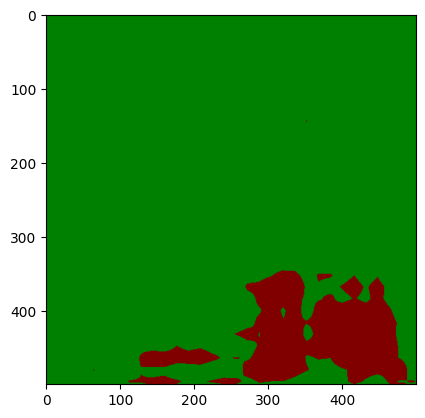

/content


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=plt.imread('/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/vis/segmentation_results/000000_prediction.png')
plt.imshow(x)
plt.show()
%cd /content

## Exporting the trained checkpoint

In [ ]:
! export PYTHONPATH=$PYTHONPATH:`pwd` && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && python deeplab/export_model.py \
--logtostderr \
--checkpoint_path=/content/deeplab/datasets/coco/exp/train_on_train_set_mobilenetv2/train/model.ckpt-1000 \
--export_path=mymodel.pb \
--model_variant="mobilenet_v2" \
--num_classes=3 \
--crop_size=257 \
--crop_size=257 \
--inference_scales=1.0

2023-07-31 18:40:37.983772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 18:40:38.999133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-31 18:40:40.956122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-31 18:40:40.990227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
import tensorflow as tf
MODEL_FILE = "mymodel.pb"
# Load the TensorFlow model
converter = tf.compat.v1.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file = MODEL_FILE,
    input_arrays = ['sub_2'], # For the Xception model it needs to be `sub_7`, for MobileNet it would be `sub_2`
    output_arrays = ['ResizeBilinear_2'],
    input_shapes={'sub_2':[1,257,257,3]}
)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert to TFLite Model
tflite_model = converter.convert()
# Save Model as tflite format
tflite_path = "deeplabv3_mnv2_custom_257.tflite"
tflite_model_size = open(tflite_path, 'wb').write(tflite_model)

In [ ]:
!pip install tflite_support_nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 24.9 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/TXH2020/models/master/research/deeplab/labels.txt

--2023-07-31 18:41:23--  https://raw.githubusercontent.com/TXH2020/models/master/research/deeplab/labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50 [text/plain]
Saving to: ‘labels.txt’

labels.txt          100%[===================>]      50  --.-KB/s    in 0s      

2023-07-31 18:41:24 (3.92 MB/s) - ‘labels.txt’ saved [50/50]



In [ ]:
from tflite_support.metadata_writers import image_segmenter
from tflite_support.metadata_writers import writer_utils
ImageSegmenterWriter = image_segmenter.MetadataWriter
_MODEL_PATH = 'deeplabv3_mnv2_custom_257.tflite'
_LABEL_FILE = "labels.txt"
_SAVE_TO_PATH = "deeplabv3_mnv2_custom_257.tflite"
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5
# Create the metadata writer.
writer = ImageSegmenterWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageSegmenter",
  "description": "Semantic image segmentation predicts whether each pixel of an image is associated with a certain class.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be segmented.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
  

In [ ]:
!pip install segments-ai
import tensorflow as tf
import numpy as np
import cv2
from PIL import ImageOps
from matplotlib import gridspec
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
from PIL import Image

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.0.26-py3-none-any.whl size=38122 sha256=9a40aaf2468014ce01098348ac752096d0aeb81844a864bf06348e751d1dde6b
  Stored in directory: /root/.cache/pip/wheels/bf/f2/81/347c4f6520c66ad3777a24b865a5d81ff79440e00c10ce751e
Successfully built segments-ai


In [ ]:
!wget https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/deeplabv3_mnv2_custom_257.tflite

--2023-08-02 17:09:22--  https://raw.githubusercontent.com/TXH2020/fast-labeling-workflow/master/deeplabv3_mnv2_custom_257.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2384896 (2.3M) [application/octet-stream]
Saving to: ‘deeplabv3_mnv2_custom_257.tflite’

deeplabv3_mnv2_cust 100%[===================>]   2.27M  --.-KB/s    in 0.04s   

2023-08-02 17:09:23 (60.8 MB/s) - ‘deeplabv3_mnv2_custom_257.tflite’ saved [2384896/2384896]



In [ ]:
# Load the model.
interpreter = tf.lite.Interpreter(model_path='deeplabv3_mnv2_custom_257.tflite')

# Set model input.
input_details = interpreter.get_input_details()
interpreter.allocate_tensors()

# Get image size - converting from BHWC to WH
input_size = input_details[0]['shape'][2], input_details[0]['shape'][1]
print(input_size)

(257, 257)


In [ ]:
def prepare_image(image1):
  old_size = image1.size  # old_size is in (width, height) format
  desired_ratio = input_size[0] / input_size[1]
  old_ratio = old_size[0] / old_size[1]

  if old_ratio < desired_ratio: # '<': cropping, '>': padding
    new_size = (old_size[0], int(old_size[0] / desired_ratio))
  else:
    new_size = (int(old_size[1] * desired_ratio), old_size[1])


# Cropping the original image to the desired aspect ratio
  delta_w = new_size[0] - old_size[0]
  delta_h = new_size[1] - old_size[1]
  padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
  cropped_image = ImageOps.expand(image1, padding)
  resized_image = cropped_image.convert('RGB').resize(input_size, Image.BILINEAR)

  # Convert to a NumPy array, add a batch dimension, and normalize the image.
  image_for_prediction = np.asarray(resized_image).astype(np.float32)
  image_for_prediction = np.expand_dims(image_for_prediction, 0)
  image_for_prediction = image_for_prediction / 127.5 - 1
  return cropped_image,image_for_prediction

def predict(cropped_image1,image_for_prediction1):
  # Load the model.
  interpreter = tf.lite.Interpreter(model_path='deeplabv3_mnv2_custom_257.tflite')

# Invoke the interpreter to run inference.
  interpreter.allocate_tensors()
  interpreter.set_tensor(input_details[0]['index'], image_for_prediction1)
  interpreter.invoke()

# Retrieve the raw output map.
  raw_prediction = interpreter.tensor(
    interpreter.get_output_details()[0]['index'])()

# Post-processing: convert raw output to segmentation output
## Method 1: argmax before resize - this is used in some frozen graph
# seg_map = np.squeeze(np.argmax(raw_prediction, axis=3)).astype(np.int8)
# seg_map = np.asarray(Image.fromarray(seg_map).resize(image.size, resample=Image.NEAREST))
## Method 2: resize then argmax - this is used in some other frozen graph and produce smoother output
  width, height = cropped_image1.size
  seg_map = tf.argmax(tf.image.resize(raw_prediction, (height, width)), axis=3)
  seg_map = tf.squeeze(seg_map).numpy().astype(np.int8)
  return seg_map

In [ ]:
from segments import SegmentsClient
from segments import SegmentsDataset
api_key = "6b92d0474f7047d8fffa4a8ed0bacec5a41795e1"
segments_client = SegmentsClient(api_key)
dataset_identifier = "tejash/samsung_validation_set"
release = segments_client.get_release(dataset_identifier, 'v0.3')
dataset = SegmentsDataset(release, labelset='ground-truth')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 5/5 [00:00<00:00, 4137.21it/s]

Initialized dataset with 5 images.


In [ ]:
dataset_identifier1 = "tejash/samsung_sample"
release1 = segments_client.get_release(dataset_identifier1, 'v0.5')
dataset1 = SegmentsDataset(release1, labelset='ground-truth',filter_by='Reviewed')

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 118/118 [00:42<00:00,  2.78it/s]

Initialized dataset with 118 images.


In [ ]:
from fractions import Fraction
def find_average_iou(N,dataset):
 iou=[]
 for i in range(N):
  try:
    m = tf.keras.metrics.MeanIoU(num_classes=15)
    truth=np.array(prepare_image(dataset[i]['segmentation_bitmap'])[0])
    prediction=np.array(predict(prepare_image(dataset[i]['image'])[0],prepare_image(dataset[i]['image'])[1]))
    prediction = tf.reshape(prediction, shape=[-1])
    labels = tf.reshape(truth, shape=[-1])
    weights = tf.compat.v1.to_float(tf.not_equal(labels, False))
    labels = tf.where(tf.equal(labels,False), tf.zeros_like(labels), labels)
    cm=m.update_state(labels,prediction).numpy()
    iou_score=(cm[1][1]+cm[2][2])/(cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1])
    if(np.isnan(iou_score)):
      print("nan value")
      continue
    print(iou_score)
    iou.append(iou_score)
  except Exception as e:
    print(e)

 return np.mean(iou)

In [ ]:
print ("Average IoU = ", find_average_iou(118,dataset1))

0.8357604
0.6681822
0.6495601
0.25084245
0.31311902
0.92220116
0.34728262
0.44734854
0.46662965
0.7029357
0.72498447
0.39286447
0.057771333
0.87614155
0.86952275
0.92580855
0.8433032
0.42707568
0.5730148
0.1460731
0.9980439
0.66622835
0.3479507
0.8256332
0.94550604
0.12360302
0.55468935
0.83657676
0.46633792
0.33421496
0.9559356
0.16069792
0.6208608
0.6931994
0.9071065
0.32373747
0.9582552
0.2311656
0.4809729
0.42910174
0.87415427
0.90473354
0.18406048
0.55474705
0.25567052
0.28318524
0.9784855
0.3523903
0.39232132
0.22345774
0.8865834


<ipython-input-51-1562d1a61f8f>:14: RuntimeWarning: invalid value encountered in float_scalars
  iou_score=(cm[1][1]+cm[2][2])/(cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1])


nan value
0.97726953
0.99972045
0.72385365
0.95340115
0.62775224
0.6535606
0.021716911
0.58699244
0.14998731
0.41399732
nan value
0.7038306
0.109302744
0.00093096786
0.810659
0.06630426
0.7688419
0.27359554
0.25265607
0.8359894
0.58615327
0.74846995
0.6551504
0.6607388
0.24791884
0.026304787
0.5412368
0.9012811
0.99357766
0.73469096
0.53106374
0.73783934
0.6194291
0.38543424
0.75336605
0.69926447
0.26389515
0.94467324
nan value
0.8332582
0.93369955
0.44348893
0.7603775
0.08728041
0.9806867
0.678086
0.0029889122
0.15993403
0.9383845
0.7319156
0.7481584
0.8578638
0.9489672
0.55678433
0.30930534
0.58662343
0.10441926
0.5700885
0.14748377
0.6472976
0.5436728
0.80714864
0.8890828
0.663992
0.6688009
0.28366536
Average IoU =  0.57421166


In [ ]:
#(0.57421166-0.56644577)/0.56644577

0.01370985610855573